In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam,sgd,Adadelta
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 5

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('C:/Users/suris/Downloads/fashionmnist/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('C:/Users/suris/Downloads/fashionmnist/fashion-mnist_test.csv', sep = ',')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = np.array(train_df, dtype = 'float32')

In [5]:
test_data = np.array(test_df, dtype='float32')

In [6]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]


In [7]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

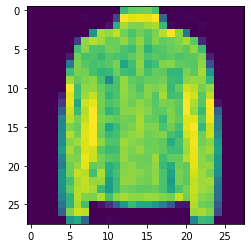

In [8]:
image = x_train[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [9]:
image_rows = 28

image_cols = 28

batch_size = 512

image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d visualisation


In [10]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [11]:
cnn_model = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.8),
    Flatten(), # flatten out the layers
    Dense(2,activation='relu'),
    Dense(10,activation = 'softmax')
    
])
cnn_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3380)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6762      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30        
Total params: 6,992
Trainable params: 

In [12]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adadelta(lr=0.0001),metrics =['accuracy'])

In [13]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=2,
    verbose=1,
    validation_data=(x_validate,y_validate),
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 22s 469us/step - loss: 2.3087 - accuracy: 0.1124 - val_loss: 2.2953 - val_accuracy: 0.1282
Epoch 2/2
48000/48000 [==============================] - 20s 411us/step - loss: 2.3087 - accuracy: 0.1107 - val_loss: 2.2951 - val_accuracy: 0.1276


In [14]:
score = cnn_model.evaluate(x_validate,y_validate,verbose=1)
print('validation Loss : {:.4f}'.format(score[0]))
print('validation Accuracy : {:.4f}'.format(score[1]))


12000/12000 [==============================] - 2s 180us/step
validation Loss : 2.2951
validation Accuracy : 0.1276
